In [1]:
import pandas as pd
import numpy as np 
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('train1.csv')
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y=train_df['y']
train_df.drop(['y'],axis=1,inplace=True)

In [4]:
num_cols=[col for col in train_df.columns if train_df[col].dtype!='object']

cat_cols=[col for col in train_df.columns if train_df[col].dtype=='object']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(train_df,y,test_size=0.2,random_state=0)

# One Hot Encoding

In [6]:
ohe_train=pd.get_dummies(X_train[cat_cols])   
ohe_test=pd.get_dummies(X_test[cat_cols])

In [7]:
ohe_train_final,ohe_test_final=ohe_train.align(ohe_test,join='inner',axis=1,fill_value=0)

In [8]:
X_train_final=pd.concat([X_train[num_cols],ohe_train_final],axis=1)
X_test_final=pd.concat([X_test[num_cols],ohe_test_final],axis=1)

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_final,y_train)
pred=lr.predict(X_test_final)

r2_score(y_test,pred)

print('Test Score',lr.score(X_train_final,y_train))

print('Test Score',lr.score(X_test_final,y_test))

Test Score 0.6530487294547794
Test Score 0.4315183976445266


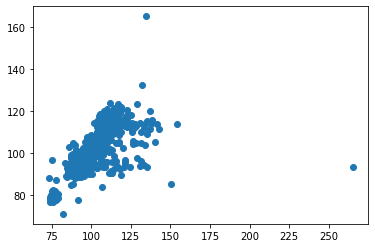

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.show()

In [11]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df[0:20]

,Actual Value,Predicted Value,Difference
3431,96.49,102.795505,-6.305505
2131,96.93,93.297485,3.632515
2680,114.22,118.652249,-4.432249
195,88.10,94.170624,-6.070624
3032,92.63,96.970456,-4.340456
2694,93.83,94.723166,-0.893166
1830,109.79,115.433550,-5.643550
304,89.03,92.266602,-3.236602
2891,109.38,116.252654,-6.872654
2498,103.90,109.382344,-5.482344


# Lasso

In [12]:
lasso_reg=Lasso(alpha=3)
lasso_reg.fit(X_train_final,y_train)
pred=lasso_reg.predict(X_test_final)

print('Test Score',lasso_reg.score(X_train_final,y_train))
print('Test Score',lasso_reg.score(X_test_final,y_test))

Test Score 0.15174578039665232
Test Score 0.1240144392649164


# Sochastic Gradient Discent Regresor

In [13]:
sgd_reg=SGDRegressor(alpha=1)
sgd_reg.fit(X_train_final,y_train)
pred=sgd_reg.predict(X_test_final)

print('Test Score',sgd_reg.score(X_train_final,y_train))
print('Test Score',sgd_reg.score(X_test_final,y_test))

#coeff=sgd_reg.coef_
#coeff==0

Test Score -6.995798343042605e+28
Test Score -5.722217069781082e+28


# Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
ds_reg=DecisionTreeRegressor()
ds_reg.fit(X_train_final,y_train)
pred=ds_reg.predict(X_test_final)
#r2_score(y_test,pred)
print('Test Score',ds_reg.score(X_train_final,y_train))
print('Test Score',ds_reg.score(X_test_final,y_test))


Test Score 1.0
Test Score 0.05732850167192749


# Feature Scaling
## Standard Scaler(Standardization ) And Min Max Scaler (Normalization )

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()

for col in num_cols:
    X_train_final[col]=scaler.fit_transform(np.array(X_train_final[col]).reshape(-1,1))
    X_test_final[col]=scaler.transform(np.array(X_test_final[col]).reshape(-1,1))

# Principal Component Analysis

array([6.87582377e-02, 5.77003214e-02, 4.53259505e-02, 3.43536894e-02,
       3.25503170e-02, 3.18935550e-02, 2.89659377e-02, 2.19563847e-02,
       2.00863141e-02, 1.82548386e-02, 1.67268155e-02, 1.57514031e-02,
       1.52036661e-02, 1.48867086e-02, 1.36635931e-02, 1.32327092e-02,
       1.25695678e-02, 1.18225136e-02, 1.13376317e-02, 1.10774843e-02,
       1.01296622e-02, 9.83627844e-03, 9.66335255e-03, 9.18057911e-03,
       8.53613705e-03, 8.18211354e-03, 7.81414017e-03, 7.81170835e-03,
       7.36180095e-03, 7.14814274e-03, 6.86343720e-03, 6.78467658e-03,
       6.65973655e-03, 6.53512784e-03, 6.34524696e-03, 6.12658108e-03,
       5.96097748e-03, 5.90640241e-03, 5.84409569e-03, 5.71692823e-03,
       5.57317993e-03, 5.48123884e-03, 5.26097986e-03, 5.23639930e-03,
       5.11849581e-03, 5.04598580e-03, 4.94254345e-03, 4.71526261e-03,
       4.59528972e-03, 4.53150664e-03, 4.45042682e-03, 4.36565462e-03,
       4.29290915e-03, 4.21561697e-03, 4.14947109e-03, 4.12249589e-03,
      

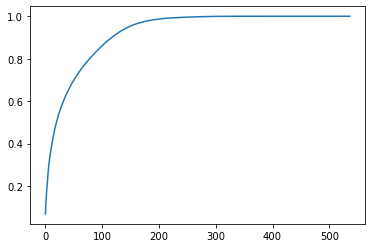

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train_final))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

In [19]:
pca_1=PCA(n_components=50)
X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train_final),columns=list(range(0,50)))
X_test_pca_df=pd.DataFrame(pca_1.transform(X_test_final))

# variance_inflation_factor

In [20]:
# proof that PCA results in zero or no Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]
vif_pca["Column Name"] = X_train_pca_df.columns
vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=40)
rf.fit(X_train_pca_df,y_train)
pred=rf.predict(X_test_pca_df)
print('Train Score',rf.score(X_train_pca_df,y_train))
print('Test Score',rf.score(X_test_pca_df,y_test))

Train Score 0.9282384217989678
Test Score 0.35606548608691513


In [22]:
from sklearn.ensemble import RandomForestRegressor

n_estimators=list(range(20,200,20))
accuracy=[]

for num in n_estimators:
    rf=RandomForestRegressor(n_estimators=num)
    rf.fit(X_train_pca_df,y_train)
    accuracy.append(rf.score(X_train_pca_df,y_train))   

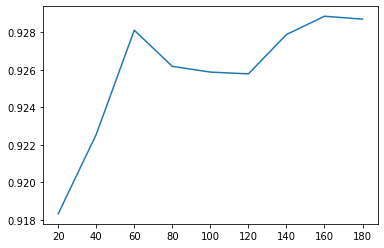

In [23]:
import matplotlib.pyplot as plt

plt.plot(n_estimators,accuracy)


# Ada Boost Regressor

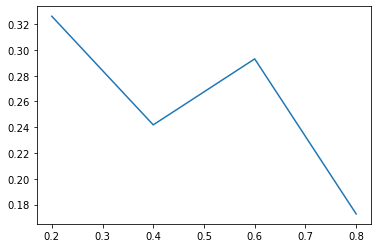

In [24]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np

learning_rate=[0.2,0.4,0.6,0.8]
n_estimators=np.arange(10,200,20)
accuracy=[]

for num in learning_rate:
    abc=AdaBoostRegressor(learning_rate=num)
    abc.fit(X_train_pca_df,y_train)
    accuracy.append(abc.score(X_train_pca_df,y_train))   
    
plt.plot(learning_rate,accuracy)    

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

rf=RandomForestRegressor(random_state=42)

param_dict={
            'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']
           }
rscv=RandomizedSearchCV(rf,param_dict,cv=5,verbose=5)
rscv.fit(X_train_pca_df,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_split=9, n_estimators=60; total time=   8.6s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_split=9, n_estimators=60; total time=   8.5s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_split=9, n_estimators=60; total time=   8.5s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_split=9, n_estimators=60; total time=   8.7s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_split=9, n_estimators=60; total time=   8.4s
[CV 1/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=  12.0s
[CV 2/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=  12.0s
[CV 3/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=  12.4s
[CV 4/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100; total time=  13.0s
[CV 5/5] END

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 9],
                                        'n_estimators': [50, 60, 70, 100]},
                   verbose=5)

In [26]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'n_estimators': 100, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 9}
RandomForestRegressor(max_depth=9, min_samples_split=7, random_state=42)
0.5123246365846271


# 5. Gradiant Boost Regressor

In [27]:
gbc=GradientBoostingRegressor()
gbc.fit(X_train_pca_df,y_train)
pred=gbc.predict(X_test_pca_df)
print('Train Score',gbc.score(X_train_pca_df,y_train))
print('Test Score',gbc.score(X_test_pca_df,y_test))

Train Score 0.6834099206712669
Test Score 0.4025918175927131


# 6. XGBoost Regressor


In [28]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train_pca_df,y_train)
pred=xgb.predict(X_test_pca_df)
print('Train Score',xgb.score(X_train_pca_df,y_train))
print('Test Score',xgb.score(X_test_pca_df,y_test))

Train Score 0.9620059425913957
Test Score 0.3268294615440588


# Support Vector Machine
## Support Vector Regression


In [30]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_pca_df,y_train)
pred=svr.predict(X_test_pca_df)
print('Train score',svr.score(X_train_pca_df,y_train))
print('Test Score',svr.score(X_test_pca_df,y_test))

Train score 0.5036089010158096
Test Score 0.39055705195673274


In [31]:
param_dict={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

rscv=RandomizedSearchCV(svr,param_dict,refit=True,verbose=3)
rscv.fit(X_train_pca_df,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.6s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   4.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   4.0s
[CV 1/5] END .....................C=100, gamma=1, kernel=rbf; total time=   3.4s
[CV 2/5] END .....................C=100, gamma=1, kernel=rbf; total time=   2.8s
[CV 3/5] END .....................C=100, gamma=1, kernel=rbf; total time=   3.3s
[CV 4/5] END .....................C=100, gamma=1, kernel=rbf; total time=   2.7s
[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   2.8s
[CV 1/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   2.1s
[CV 2/5] END ...................C=10, gamma=0.01

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [32]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
SVR(C=1000, gamma=0.0001)
0.5276903205187651


# 9. K Nearest Neighbors Regresssor (KNN)


In [33]:
knn=KNeighborsRegressor()
knn.fit(X_train_pca_df,y_train)
pred=knn.predict(X_test_pca_df)
print('Train Score',knn.score(X_train_pca_df,y_train))
print('Test Score',knn.score(X_test_pca_df,y_test))


Train Score 0.6296223819974847
Test Score 0.3458437594998901


# Unsupervised Learning
## K-Mean Clustering

Text(0.5, 1.0, 'Elbow Curve')

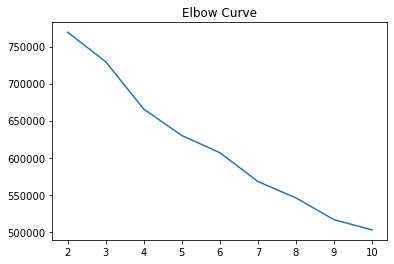

In [34]:
from sklearn.cluster import KMeans
kmns=KMeans()
kmns.fit(X_train_pca_df)

#finding the optimul number of clusters

num_clusters=range(2,11)

wss=[]  # Within Sum Of Square(WSS)

for n in num_clusters:
    kmns=KMeans(n_clusters=n)
    kmns.fit(X_train_pca_df)
    wss.append(kmns.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')

In [ ]:
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
#vif["features"] = X_train_final.columnsh
#vif